# Real-world Data Wrangling

### **1.1.** Problem Statement


The current project will test the assumption that in colder locations individuals have a higher economic wellbeing, or GDP (economic output per person). In order to achieve this, data from cities' GDP will be retrieved from online databases, as well as the weather per location. Since there were challenges finding datasets with weather information, data from the locations latitude will be used. In other words, is there a link between a city's GDP and their absolute latitude? For exploratory purposes, the link between city's GDP and longitude will also be analyzed.

#### **Dataset 1 - Cities and Geographical Location**

Type: CSV File

Method: The data was found in Kaggle (https://www.kaggle.com/datasets/juanmah/world-cities?resource=download&select=worldcities.csv). Since Kaggle offered the option to manually download the file in csv format, I downloaded it and uploaded it to Jupyter.

Dataset variables:

*   **Variable 1**. city = Name of the city
*   **Variable 2**. city_ascii = city as an ASCII string (e.g. Goiania). Left blank if ASCII representation is not possible.
*   **Variable 3**. lat = The latitude of the city/town.
*   **Variable 4**. lng = The longitude of the city/town.
*   **Variable 5**. country = The name of the city/towns country.
*   **Variable 6**. iso2 = The alpha-2 iso code of the country.
*   **Variable 7**. iso3 = The alpha-3 iso code of the country.
*   **Variable 8**. admin_name = The name of the highest level administration region of the city town
*   **Variable 9**. capital = Blank string if not a capital, otherwise: - primary - countrys capital - admin - first-level admin capital
*   **Variable 10**. population = An estimate of the citys urban population. Only available for some (prominent) cities.
*   **Variable 11**. id = id number

In [170]:
# Dataset 1 was downloaded by using the read pandas function

import pandas as pd

df_1 = pd.read_csv("worldcities.csv")

In [171]:
#The head function was used to visually check if the data was downloaded correctly

df_1.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


#### **Dataset 2 - Cities and GDP**

Type: HTML File

Method: Based on the first dataset gathered, my goal was to find data in a tabular format which contained a list of cities (so I could match it with the first dataset), and information on the cities' GDP. The current dataset was found on Wikipedia and I collected the data by programmatically downloading it.

Dataset variables:

*   **Variable 1**. rank = Rank based on GDP
*   **Variable 2**. City proper/metropolitan area = Name of city
*   **Variable 3**. Country/region = Name of country
*   **Variable 4**. Official est. GDP up to date (billion USD) = Official estimation GDP up to date (billion USD)
*   **Variable 5**. Metropolitan population = total population
*   **Variable 6**. GDP per capita (USD) = GDP per capita (USD)

In [172]:
#Dataset 2 was downloaded programatically, since the HTML file was in a tabular format, lxml was installed

import numpy as np
!pip install lxml

url = 'https://en.wikipedia.org/wiki/List_of_cities_by_GDP#List'

df_2 = pd.read_html(url)[0] 

In [173]:
#The head function was used to visually check if the data was downloaded correctly

df_2.head()

,Rank,City proper/metropolitan area,Country/region,Official est. GDP up to date (billion US$),Metropolitan population
0,300+,A Coruña metropolitan area,Spain,28.819 (2020)[5],"1,121,815 (2020)[6]"
1,300+,Aachen,Germany,24.296 (2020)[5],"249,070 (2021)[7]"
2,300+,Aalborg,Denmark,31.855 (2021)[5],"219,487 (2021)[8]"
3,239,Aarhus,Denmark,54.927 (2021)[5],"352,751 (2021)[9]"
4,300+,"Abbotsford, British Columbia",Canada,6.239 (2020)[10],"203,907 (2020)[11]"


In [174]:
# Saved a file with the raw data
df_2.to_csv("GDP_raw.csv", index=False, encoding="utf-8")

## 2. Assess data

In both datasets a number of quality and tidiness issues were identified. Below there is an overview:

### Quality Issue 1: Missing Data in Dataset 1

Based on a visual inspection of the description of the columns, it can be assumed that in the first dataset, the column city_ascii might have missing data.

In [175]:
# Use info function to programatically explore Dataset 1, since this will show the number of nulls

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        47868 non-null  object 
 1   city_ascii  47867 non-null  object 
 2   lat         47868 non-null  float64
 3   lng         47868 non-null  float64
 4   country     47868 non-null  object 
 5   iso2        47835 non-null  object 
 6   iso3        47868 non-null  object 
 7   admin_name  47671 non-null  object 
 8   capital     13023 non-null  object 
 9   population  47656 non-null  float64
 10  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


Issue and justification: Based on the visual inspection of the definition of the columns (e.g., city_ascii) it was concluded that date could be missing. When taking a look at the dataset information by using the info function, it is observed that more columns have missing, or non-null data.

### Quality Issue 2: Incorrect Data Type in Dataset 2

After visually inspecting the dataframe, more specificially, observing the first 5 rows of the second dataset, it was noted that there were columns with non-numerical characters. However, data types like integeres and floats are necessary to analyze the data at a later stage.

In [176]:
# Use datatype function to inspect the Dataset 2 progammatically

df_2.dtypes

Rank                                          object
City proper/metropolitan area                 object
Country/region                                object
Official est. GDP up to date (billion US$)    object
Metropolitan population                       object
dtype: object

Issue and justification: In the Metropolitan population column, the fact that characters like brackets are present, makes me assume that the data type might be a string but not an integer. This was concluded both in the visual inspection of the first rows, as well as using the dtypes function which provided the data type of the Metropolitan population column. This was also the case for the Official est. GDP up to date, which could be a float instead of a string.

### Tidiness Issue 1: Combined Data in One Row in Dataset 2

In the Metropolitan population and Official est. GDP columns of the second dataset, it can be observed from the first rows that the year and the reference are included in the same column.



In [177]:
# Use tail function to programmatically inspect the Dataset 2

df_2.tail(10)

,Rank,City proper/metropolitan area,Country/region,Official est. GDP up to date (billion US$),Metropolitan population
884,300+,Yuxi,China,29.840 (2020)[29][234],"2,249,502 (2020)[235]"
885,300+,Zagreb metropolitan area,Croatia,29.63 (2021)[5],"1,189,279 (2021)[450]"
886,300+,Zaragoza metropolitan area,Spain,29.702 (2020)[5],"681,877 (2020)[451]"
887,194,Zhangzhou,China,65.903 (2020)[29][258],"5,054,328 (2020)[259]"
888,72,Zhengzhou,China,192 (2022)[96][97][98],"8,950,000 (2022)[19]"
889,215,Zhenjiang,China,61.182 (2020)[29][197],"3,210,418 (2020)[198]"
890,286,Zhuzhou,China,45.029 (2020)[29],"1,330,000 (2020)[15]"
891,249,Zibo,China,53.260 (2020)[29][127],"4,704,138 (2020)[128]"
892,101,Zürich Metropolitan Area,Switzerland,158.913 (2020)[147],"1,430,000 (2020)[15]"
893,300+,Zwolle,Netherlands,17.936 (2020)[5],"129,840 (2021)[452]"


Issue and justification: Based on the visual inspection of the first rows, as well as using the tail function to check if this data quality issue was also present along the dataset (among several other functions that could be used), it can be concluded that the year, and reference have been combined into one column for both the Official est. GDP up to date and Metropolitan population columns.

### Tidiness Issue 2: Spaces in the Column Titles of Dataset 2

By visually inspecting the dataset 2, it can be observed that the name of the columns have spaces in between, which can be problematic at a later stage when creating functions with the columns.

In [178]:
# Use info function to explore Dataset 2 where all the names of the columns are listed

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Rank                                        894 non-null    object
 1   City proper/metropolitan area               894 non-null    object
 2   Country/region                              894 non-null    object
 3   Official est. GDP up to date (billion US$)  894 non-null    object
 4   Metropolitan population                     894 non-null    object
dtypes: object(5)
memory usage: 35.1+ KB


Issue and justification: As per the initial observation of the table, as well as using the info function which provided the full name of all columns, it can be concluded that most of the columns have spaces in between.

## 3. Clean data
In the next section, the four issues identified above are solved. Please note that they are solved in a different order from the ones listed above, as this was necessary to retain data quality and structure.

In [179]:
# Make copies of the datasets to ensure the raw dataframes are not impacted

df_1_copy = df_1.copy()
df_2_copy = df_2.copy()

### Quality Issue 1: Missing Data in Dataset 1

In [180]:
# To ensure data completness, the dropna function was applied to remove missing data 

df_1_copy_cleaned = df_1_copy.dropna()

In [181]:
# Validatation that the cleaning was successful by using the info function for the previous dataset and the cleaned dataset

df_1_copy.info()
df_1_copy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        47868 non-null  object 
 1   city_ascii  47867 non-null  object 
 2   lat         47868 non-null  float64
 3   lng         47868 non-null  float64
 4   country     47868 non-null  object 
 5   iso2        47835 non-null  object 
 6   iso3        47868 non-null  object 
 7   admin_name  47671 non-null  object 
 8   capital     13023 non-null  object 
 9   population  47656 non-null  float64
 10  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 12764 entries, 0 to 47652
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        12764 non-null  object 
 1   city_ascii  12764 non-null  object 
 2   lat         12764 non-n

Justification: Missing data was removed by using the dropna function. After removing it, there are still more than 500 rows, which still meets the requirement for this exercise. 

### Tidiness Issue 2: Spaces in the Column Titles of Dataset 2

In [182]:
#The data was cleaned by renaming each of the columns by usin the df.rename() function

df_2_copy = df_2_copy.rename(columns={'City proper/metropolitan area':'city', 'Country/region':'country',
                               'Official est. GDP up to date (billion US$)':'gdp_total', 
                              'Metropolitan population':'population', 'GDP per capita (US$)':'gdp_per_capita'})    

In [183]:
#The cleaning was validated by using the df.head() function

df_2_copy.head()

,Rank,city,country,gdp_total,population
0,300+,A Coruña metropolitan area,Spain,28.819 (2020)[5],"1,121,815 (2020)[6]"
1,300+,Aachen,Germany,24.296 (2020)[5],"249,070 (2021)[7]"
2,300+,Aalborg,Denmark,31.855 (2021)[5],"219,487 (2021)[8]"
3,239,Aarhus,Denmark,54.927 (2021)[5],"352,751 (2021)[9]"
4,300+,"Abbotsford, British Columbia",Canada,6.239 (2020)[10],"203,907 (2020)[11]"


Justification: The goal of cleaning the name of the columns was to have more succint names and remove the spaces for underlines. Along this process I also ensure that the city column had the same name in both datasets so they could be merged at a later stage.

### Tidiness Issue 1: Combined Data in One Row in Dataset 2

In [184]:
#Data related to the year and reference in columns gpd_total and population were removed

df_2_copy["gdp_total"] = df_2_copy["gdp_total"].apply(lambda x: x[:x.find(' ')] + '')
df_2_copy["population"] = df_2_copy["population"].apply(lambda x: x[:x.find(' ')] + '')


In [185]:
#The cleaning was validated by using the df.head() function

df_2_copy.head()

,Rank,city,country,gdp_total,population
0,300+,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,300+,Aachen,Germany,24.296,"249,070"
2,300+,Aalborg,Denmark,31.855,"219,487"
3,239,Aarhus,Denmark,54.927,"352,751"
4,300+,"Abbotsford, British Columbia",Canada,6.239,"203,907"


Justification: In order to change the data type of columns gdp_total and population, first they had to be cleaned by removing the information on the year and the reference. Information on the year and reference had to be removed for future analysis (e.g., creating a scatter plot)

### Quality Issue 2: Incorrect Data Type in Dataset 2

In [186]:
#The datatype for gdp_total and population is changed from object to float and to integer respectively, 
#since string data would not be possible to use for analysis like scatter plots

#Since the first time I ran it, I got the error that the string cannot be converted into a float, I removed the commas from both columns
df_2_copy["gdp_total"] = df_2_copy["gdp_total"].str.replace(',', '')
df_2_copy["population"] = df_2_copy["population"].str.replace(',', '')

#Based on the errors I got when running the code, I also had to edit three data points

df_2_copy["gdp_total"] = df_2_copy["gdp_total"].str.replace('(2015–16)[421', '')
df_2_copy["population"] = df_2_copy["population"].str.replace('\u2002(2022)[99', '')
df_2_copy["population"] = df_2_copy["population"].str.replace('\t(2022)[305', '')


#Convert both columns to float and integer respectively
df_2_copy["gdp_total"]=df_2_copy["gdp_total"].astype(float)
df_2_copy["population"]=df_2_copy["population"].astype(int)

In [187]:
#The cleaning was validated by using the info function

df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        894 non-null    object 
 1   city        894 non-null    object 
 2   country     894 non-null    object 
 3   gdp_total   894 non-null    float64
 4   population  894 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 35.1+ KB


Justification: In order to change gdp_total to a float, and population to an integer, first I had to conduct more cleaning, as there were datapoints with special characters.

In [188]:
#There is one more relevant step that is needed for the analysis, which is to change all the latitudes to absolute values
#in order to achieve this, all the minus characters will be removed

df_1_copy_cleaned["lat"] = df_1_copy_cleaned["lat"].abs()

#And the data cleaning is checked using the describe function
df_1_copy_cleaned["lat"].describe()

/var/folders/gs/_cm6_9jn6z55_nl7x8x8t8000000gn/T/ipykernel_23072/672717557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_copy_cleaned["lat"] = df_1_copy_cleaned["lat"].abs()


count    12764.000000
mean        30.135156
std         17.668653
min          0.020600
25%         13.391250
50%         33.979700
75%         45.483300
max         70.663400
Name: lat, dtype: float64

### **Unnecessary variables were removed, and datasets combined**

All unnecessary variables for the research question were removed to simplify the dataset

In [197]:
# Unnecessary variables removed for both datasets

ncolumns_df_1_copy_cleaned = df_1_copy_cleaned.drop(["city_ascii","country","iso2","iso3",
                                                "admin_name","capital","population","id"], axis=1)

ncolumns_df_2_copy = df_2_copy.drop(["Rank","population","country"], axis=1)

In [199]:
# Combine datasets 1 & 2 in order to conduct further analyzes

merged_df = pd.merge(ncolumns_df_1_copy_cleaned, ncolumns_df_2_copy, on=['city'], how='right')
merged_df

,city,lat,lng,gdp_total
0,A Coruña metropolitan area,NaN,NaN,28.819
1,Aachen,50.7756,6.0836,24.296
2,Aalborg,57.0500,9.9167,31.855
3,Aarhus,56.1572,10.2107,54.927
4,"Abbotsford, British Columbia",NaN,NaN,6.239
...,...,...,...,...
900,Zhenjiang,32.1880,119.4240,61.182
901,Zhuzhou,27.8290,113.1330,45.029
902,Zibo,NaN,NaN,53.260
903,Zürich Metropolitan Area,NaN,NaN,158.913


## 4. Save merged file

In [200]:
# Data was saved

merged_df.to_csv("worldcities_and_GDP_cleaned.csv", index=False, encoding="utf-8")

## 5. Research question analysis

*Research question:* Is there a link between a city's GDP and their absolute latitude?

Text(0, 0.5, 'GDP Total')

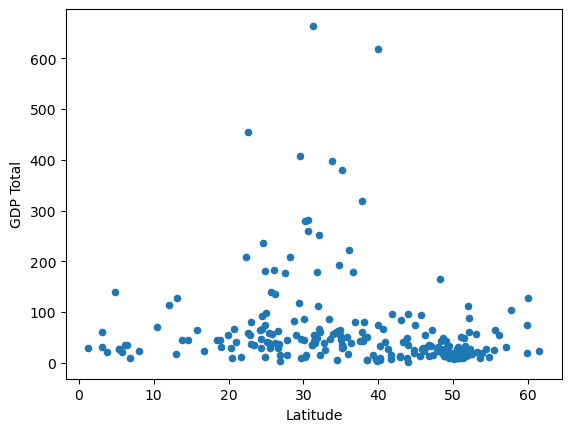

In [193]:
#To assess the link between a city's GDP and their absolute latitude, a scatter plot was visualized

Figure = merged_df.plot(x="lat", y="gdp_total", kind="scatter");
Figure.set_xlabel("Latitude")
Figure.set_ylabel("GDP Total")

Text(0, 0.5, 'GDP Total')

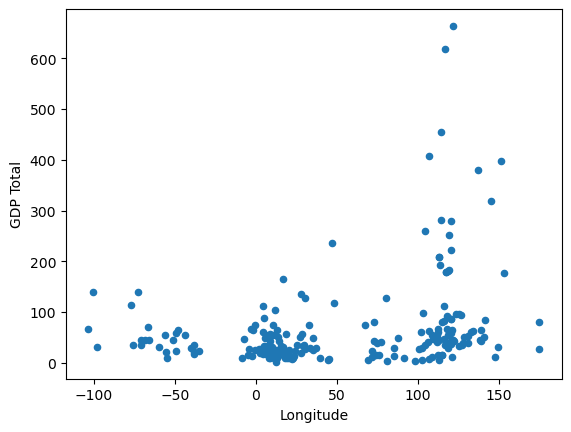

In [201]:
#For exploratory purposes, to assess the link between a city's GDP and their longitude, a scatter plot was visualized

Figure = merged_df.plot(x="lng", y="gdp_total", kind="scatter");
Figure.set_xlabel("Longitude")
Figure.set_ylabel("GDP Total")

There seems to be no strong link between the geographical location of a city and the total GDP. While a large GDP can be observed between the latitudes 20 and 40 (and potentially also -20 and -40), no conclusions can be made without further analyses for either the latitude or langitude values of a city.

### **6:** Reflection


If I had more time to complete this project, I would have searched for another dataset that I could download programatically in which the average, max, and min, weather values were provided per location. Some issues I would have further explored are outliers, or if there were many locations in the same country that could have skewed the data.